<a href="https://colab.research.google.com/github/nelsoncuia/firstgame/blob/master/C%C3%B3pia_de_20230605_Projeto_3_acoes_nelson_rodrigues_stephanie_vogel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objetivo do projeto
Traçar uma estratégia de investimento 

## Importações 
Pandas, Numpy, Matplotlib, Sklearn, Keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, LSTM

#Stock picking

Para nossa estratégia de investimento, escolheremos 5 ações das disponíveis. A escolha será feita de maneira arbitrária.

Para decidirmos a alocação em cada ativo, usaremos técnicas de teoria do portfólio moderna, encontrando o portfolio ótimo canculando a sharpe ratio.

#Lendo os dados

In [ ]:
abev3 = pd.read_csv("/content/ABEV3.csv", index_col = 0)
bbas3 = pd.read_csv("/content/BBAS3.csv", index_col = 0)
itsa4 = pd.read_csv("/content/ITSA4.csv", index_col = 0)
petr4 = pd.read_csv("/content/PETR4.csv", index_col = 0)
suzb3 = pd.read_csv("/content/SUZB3.csv", index_col = 0)


## Tratando os dados

Selecionamos as datas e horários comuns entre todos os nossos ativos que entrarão no portifolio. Para isso, utilizamos o inner join do pandas.

In [ ]:
stocks_inner = pd.merge(abev3, bbas3,  on = 'time', how = 'inner')
stocks_inner.rename(columns={"close_x": "abev3_close", "close_y": "bbas3_close"}, inplace = True)
stocks_inner.drop(columns=["open_x", "high_x", "low_x", "open_y", "high_y", "low_y"], inplace = True)
stocks_inner2 = pd.merge(stocks_inner, itsa4,  on = 'time', how = 'inner')
stocks_inner2.rename(columns={"close": "itsa4_close"}, inplace = True)
stocks_inner2.drop(columns=["open", "high", "low"], inplace = True)
stocks_inner3 = pd.merge(stocks_inner2, petr4,  on = 'time', how = 'inner')
stocks_inner3.rename(columns={"close": "petr4_close"}, inplace = True)
stocks_inner3.drop(columns=["open", "high", "low"], inplace = True)
stocks_inner4 = pd.merge(stocks_inner3, suzb3,  on = 'time', how = 'inner')
stocks_inner4.rename(columns={"close": "suzb3_close"}, inplace = True)
stocks_inner4.drop(columns=["open", "high", "low"], inplace = True)
all_stocks = stocks_inner4.copy()


In [ ]:
#Creating a colunm with the percentage change for each register

all_stocks['abev3_unit_return'] = stocks_inner4['abev3_close'].pct_change(1)
all_stocks['bbas3_unit_return'] = stocks_inner4['bbas3_close'].pct_change(1)
all_stocks['itsa4_unit_return'] = stocks_inner4['itsa4_close'].pct_change(1)
all_stocks['petr4_unit_return'] = stocks_inner4['petr4_close'].pct_change(1)
all_stocks['suzb3_unit_return'] = stocks_inner4['suzb3_close'].pct_change(1)


#Creating a colunm with the normalized return since the first register

all_stocks['abev3_normalized_return'] = stocks_inner4['abev3_close']/stocks_inner4.iloc[0]['abev3_close']
all_stocks['bbas3_normalized_return'] = stocks_inner4['bbas3_close']/stocks_inner4.iloc[0]['bbas3_close']
all_stocks['itsa4_normalized_return'] = stocks_inner4['itsa4_close']/stocks_inner4.iloc[0]['itsa4_close']
all_stocks['petr4_normalized_return'] = stocks_inner4['petr4_close']/stocks_inner4.iloc[0]['petr4_close']
all_stocks['suzb3_normalized_return'] = stocks_inner4['suzb3_close']/stocks_inner4.iloc[0]['suzb3_close']


In [ ]:

selected_columns = ['abev3_unit_return', 'bbas3_unit_return', 'itsa4_unit_return', 'petr4_unit_return',  'suzb3_unit_return']


log_ret = all_stocks.loc[:, selected_columns] 
log_ret.index = all_stocks.time

print(log_ret)

                     abev3_unit_return  bbas3_unit_return  itsa4_unit_return  \
time                                                                           
2021-07-01 11:15:00                NaN                NaN                NaN   
2021-07-01 11:16:00           0.001817           0.000670           0.000989   
2021-07-01 11:17:00          -0.002418          -0.001339          -0.000988   
2021-07-01 11:18:00           0.002424           0.000335           0.000000   
2021-07-01 11:19:00           0.000605           0.000000           0.000000   
...                                ...                ...                ...   
2022-06-06 17:44:00          -0.003571          -0.000558           0.001060   
2022-06-06 17:46:00           0.003584          -0.000279          -0.001059   
2022-06-06 17:47:00          -0.002857           0.001397           0.000000   
2022-06-06 17:50:00           0.002149           0.000279           0.000000   
2022-06-06 17:51:00           0.002144  

In [ ]:

selected_columns2 = ['abev3_normalized_return', 'bbas3_normalized_return', 'itsa4_normalized_return', 'petr4_normalized_return',  'suzb3_normalized_return']  


cumulative_return = all_stocks.loc[:, selected_columns2] 
cumulative_return.index = all_stocks.time
# Print the new data frame
print(cumulative_return)

                     abev3_normalized_return  bbas3_normalized_return  \
time                                                                    
2021-07-01 11:15:00                 1.000000                 1.000000   
2021-07-01 11:16:00                 1.001817                 1.000670   
2021-07-01 11:17:00                 0.999394                 0.999330   
2021-07-01 11:18:00                 1.001817                 0.999665   
2021-07-01 11:19:00                 1.002423                 0.999665   
...                                      ...                      ...   
2022-06-06 17:44:00                 0.844942                 1.199330   
2022-06-06 17:46:00                 0.847971                 1.198995   
2022-06-06 17:47:00                 0.845548                 1.200670   
2022-06-06 17:50:00                 0.847365                 1.201005   
2022-06-06 17:51:00                 0.849182                 1.201005   

                     itsa4_normalized_return  petr

Aqui utilizaremos uma simulação de monte carlo com portfolios aleatórios e encontraremos o portfolio ótimo para uma volatilidade fixa.

Max sharpe ratio:
0.05771177713113224
Best allocation:
[0.02671812 0.44069539 0.03127204 0.4555347  0.04577975]


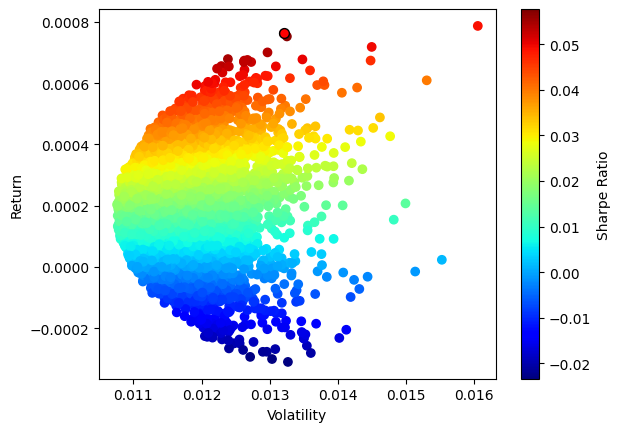

In [ ]:

#Monte Carlo simulation for allocation.
np.random.seed(101)
number_sim = 5000

all_weights = np.zeros((number_sim, 5))
return_arr = np.zeros(number_sim)
volatility_arr = np.zeros(number_sim)
sharpe_arr = np.zeros(number_sim)


for i in range(number_sim):
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)

    all_weights[i,:] = weights

    #Expected Return
    return_arr[i] = np.sum( (log_ret.mean() * weights) * 252)

    #Expected Volatility
    volatility_arr[i] = np.sqrt( np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))

    #Sharpe Ratio
    sharpe_arr[i] = return_arr[i]/volatility_arr[i]



print('Max sharpe ratio:')
print(sharpe_arr.max())

print('Best allocation:')
print(all_weights[sharpe_arr.argmax(), :])

plt.scatter(volatility_arr, return_arr, c = sharpe_arr, cmap = 'jet')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel ('Volatility')
plt.ylabel ('Return')

plt.scatter(volatility_arr[sharpe_arr.argmax()], return_arr[sharpe_arr.argmax()], c = 'red', s=50, edgecolors = 'black')
plt.show()

A alocação ótima será utilizada como proporção de cada ativo na nossa carteira.

In [ ]:
best_allocation = all_weights[sharpe_arr.argmax(), :]

# abev, bba, itsa, petr, suzb3
abev3_allo = best_allocation[0]
bbas3_allo = best_allocation[1]
itsa4_allo = best_allocation[2]
petr4_allo = best_allocation[3]
suzb3_allo = best_allocation[4]

print(best_allocation)
print(abev3_allo)
print(bbas3_allo)
print(itsa4_allo)
print(petr4_allo)
print(suzb3_allo)


[0.02671812 0.44069539 0.03127204 0.4555347  0.04577975]
0.02671812302973259
0.4406953876935387
0.03127203703053178
0.45553470287461767
0.045779749371579324


Nosso portfolio será a soma dos nossos ativos multiplicados pela proporção de alocação.

In [ ]:
#creating new dataframe as my portfolio

selected_columns_for_portfolio = ['time', 'abev3_close', 'bbas3_close', 'itsa4_close', 'petr4_close', 'suzb3_close']  # Replace with your desired column names

portfolio = all_stocks.loc[:,selected_columns_for_portfolio]
portfolio['abev3_close'] = portfolio['abev3_close']*abev3_allo
portfolio['bbas3_close'] = portfolio['bbas3_close']*bbas3_allo
portfolio['itsa4_close'] = portfolio['itsa4_close']*itsa4_allo
portfolio['petr4_close'] = portfolio['petr4_close']*petr4_allo
portfolio['suzb3_close'] = portfolio['suzb3_close']*suzb3_allo

portfolio['portfolio_sum'] = portfolio['abev3_close']+portfolio['abev3_close']+portfolio['itsa4_close']+portfolio['petr4_close']+portfolio['suzb3_close']
print(portfolio)



                      time  abev3_close  bbas3_close  itsa4_close  \
0      2021-07-01 11:15:00     0.441116    13.154757     0.316160   
1      2021-07-01 11:16:00     0.441918    13.163571     0.316473   
2      2021-07-01 11:17:00     0.440849    13.145943     0.316160   
3      2021-07-01 11:18:00     0.441918    13.150350     0.316160   
4      2021-07-01 11:19:00     0.442185    13.150350     0.316160   
...                    ...          ...          ...          ...   
67132  2022-06-06 17:44:00     0.372718    15.776895     0.295208   
67133  2022-06-06 17:46:00     0.374054    15.772488     0.294895   
67134  2022-06-06 17:47:00     0.372985    15.794523     0.294895   
67135  2022-06-06 17:50:00     0.373787    15.798930     0.294895   
67136  2022-06-06 17:51:00     0.374588    15.798930     0.295208   

       petr4_close  suzb3_close  portfolio_sum  
0        11.333703     2.697343      15.229439  
1        11.333703     2.694138      15.228150  
2        11.329148     2

In [ ]:
normalizador = MinMaxScaler()
portfolio['portfolio_norm'] = normalizador.fit_transform(np.expand_dims(portfolio['portfolio_sum'], axis=1))

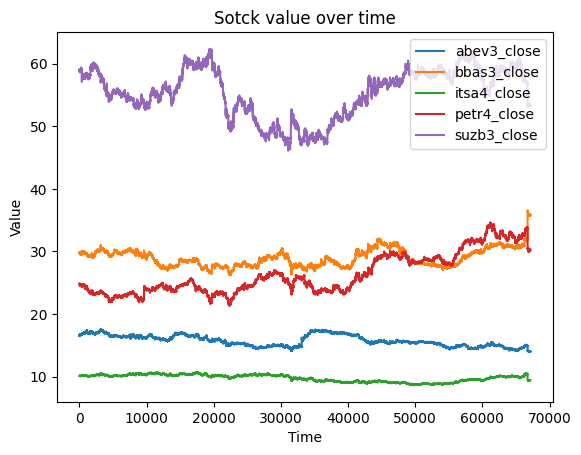

In [ ]:
all_stocks['abev3_close'].plot(title='Sotck value over time')
all_stocks['bbas3_close'].plot()
all_stocks['itsa4_close'].plot()
all_stocks['petr4_close'].plot()
all_stocks['suzb3_close'].plot()
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Função para gerar nossos inputs (dividr a série temporal)

In [ ]:
def gerar_inputs(serie, janela, salto=0):
  x, y = [], []
  for i in range(len(serie)-janela-salto):
    x.append(serie[i:i+janela])
    y.append(serie[i+janela+salto])
  return np.array(x), np.array(y)

In [ ]:
x,y = gerar_inputs(portfolio['portfolio_norm'], 40)

#dividir portfolio em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=.7)

##Modelos iniciais
Modelos para prever o valor imediatamente depois dos nossos inputs

In [ ]:
model = Sequential()
model.add(LSTM(input_shape = (20,1), units = 5))
model.add(Dense(units=5, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5)                 140       
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mae')
model.fit(x_treino, y_treino, validation_data=(x_teste, y_teste), epochs=10)

Epoch 1/10
1469/1469 [==============================] - 11s 6ms/step - loss: 0.0458 - val_loss: 0.0093
Epoch 2/10
1469/1469 [==============================] - 9s 6ms/step - loss: 0.0087 - val_loss: 0.0115
Epoch 3/10
1469/1469 [==============================] - 9s 6ms/step - loss: 0.0069 - val_loss: 0.0101
Epoch 4/10
1469/1469 [==============================] - 10s 7ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 5/10
1469/1469 [==============================] - 9s 6ms/step - loss: 0.0059 - val_loss: 0.0080
Epoch 6/10
1469/1469 [==============================] - 9s 6ms/step - loss: 0.0056 - val_loss: 0.0070
Epoch 7/10
1469/1469 [==============================] - 9s 6ms/step - loss: 0.0053 - val_loss: 0.0045
Epoch 8/10
1469/1469 [==============================] - 9s 6ms/step - loss: 0.0051 - val_loss: 0.0065
Epoch 9/10
1469/1469 [==============================] - 11s 7ms/step - loss: 0.0049 - val_loss: 0.0073
Epoch 10/10
1469/1469 [==============================] - 9s 6ms/step - loss: 0.

630/630 [==============================] - 1s 2ms/step


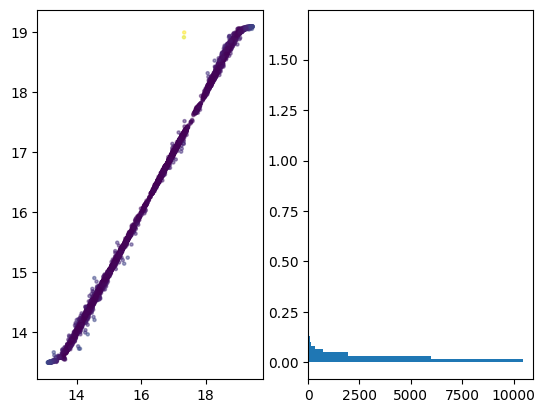

In [ ]:
comparacao = pd.DataFrame(data={'real': normalizador.inverse_transform(y_teste.reshape(-1,1)).squeeze(),
                                 'prev': np.round(normalizador.inverse_transform(model.predict(x_teste)).squeeze(), 2)})
comparacao['dif'] = abs(comparacao.real - comparacao.prev)
fig, axs = plt.subplots(ncols=2)
axs[1].hist(x=comparacao['dif'], bins=100, orientation='horizontal')
axs[0].scatter(x=comparacao['real'],y=comparacao['prev'],c=comparacao['dif'],alpha=.5, s=5)

In [ ]:
print(comparacao['dif'].mean())

0.02460858341427116


Epoch 1/10
1468/1468 [==============================] - 17s 11ms/step - loss: 0.0318 - val_loss: 0.0061
Epoch 2/10
1468/1468 [==============================] - 16s 11ms/step - loss: 0.0056 - val_loss: 0.0058
Epoch 3/10
1468/1468 [==============================] - 15s 10ms/step - loss: 0.0045 - val_loss: 0.0031
Epoch 4/10
1468/1468 [==============================] - 16s 11ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 5/10
1468/1468 [==============================] - 16s 11ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 6/10
1468/1468 [==============================] - 15s 10ms/step - loss: 0.0038 - val_loss: 0.0050
Epoch 7/10
1468/1468 [==============================] - 15s 10ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 8/10
1468/1468 [==============================] - 15s 10ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 9/10
1468/1468 [==============================] - 16s 11ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 10/10
630/630 [==============================] - 2s 2ms/st

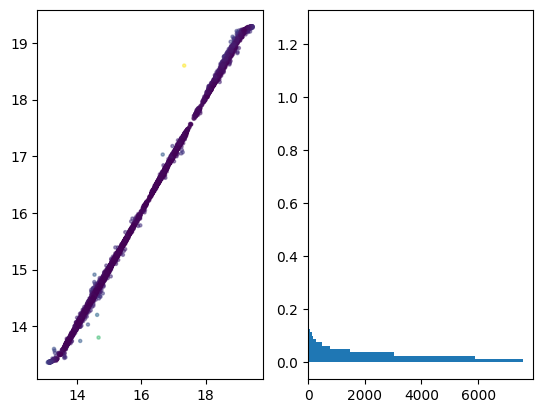

In [ ]:
model2 = Sequential()
model2.add(LSTM(input_shape = (40,1), units = 5))
model2.add(Dense(units=1, activation='sigmoid'))

model2.compile(loss='mae')
model2.fit(x_treino, y_treino, validation_data=(x_teste, y_teste), epochs=10)

comparacao = pd.DataFrame(data={'real': normalizador.inverse_transform(y_teste.reshape(-1,1)).squeeze(),
                                 'prev': np.round(normalizador.inverse_transform(model2.predict(x_teste)).squeeze(), 2)})
comparacao['dif'] = abs(comparacao.real - comparacao.prev)
fig, axs = plt.subplots(ncols=2)
axs[1].hist(x=comparacao['dif'], bins=100, orientation='horizontal')
axs[0].scatter(x=comparacao['real'],y=comparacao['prev'],c=comparacao['dif'],alpha=.5, s=5)

Epoch 1/10
1468/1468 [==============================] - 19s 12ms/step - loss: 0.0256 - val_loss: 0.0124
Epoch 2/10
1468/1468 [==============================] - 18s 12ms/step - loss: 0.0098 - val_loss: 0.0050
Epoch 3/10
1468/1468 [==============================] - 18s 12ms/step - loss: 0.0078 - val_loss: 0.0111
Epoch 4/10
1468/1468 [==============================] - 18s 12ms/step - loss: 0.0068 - val_loss: 0.0078
Epoch 5/10
1468/1468 [==============================] - 17s 12ms/step - loss: 0.0061 - val_loss: 0.0068
Epoch 6/10
1468/1468 [==============================] - 18s 12ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 7/10
1468/1468 [==============================] - 18s 12ms/step - loss: 0.0054 - val_loss: 0.0058
Epoch 8/10
1468/1468 [==============================] - 18s 12ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 9/10
1468/1468 [==============================] - 18s 12ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 10/10
630/630 [==============================] - 2s 3ms/st

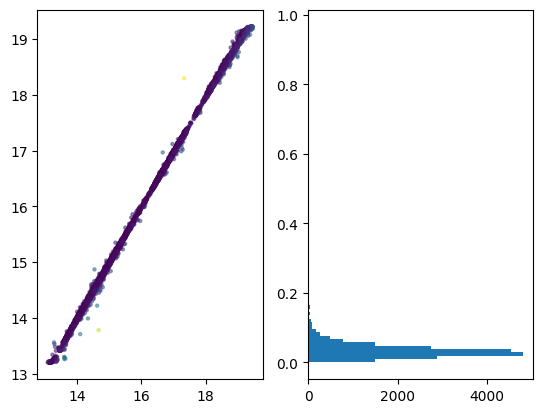

In [ ]:
model3 = Sequential()
model3.add(LSTM(input_shape = (40,1), units = 20))
model3.add(Dense(units=25, activation='sigmoid'))
model3.add(Dense(units=1, activation='sigmoid'))

model3.compile(loss='mae')
model3.fit(x_treino, y_treino, validation_data=(x_teste, y_teste), epochs=10)

comparacao = pd.DataFrame(data={'real': normalizador.inverse_transform(y_teste.reshape(-1,1)).squeeze(),
                                 'prev': np.round(normalizador.inverse_transform(model2.predict(x_teste)).squeeze(), 2)})
comparacao['dif'] = abs(comparacao.real - comparacao.prev)
fig, axs = plt.subplots(ncols=2)
axs[1].hist(x=comparacao['dif'], bins=100, orientation='horizontal')
axs[0].scatter(x=comparacao['real'],y=comparacao['prev'],c=comparacao['dif'],alpha=.5, s=5)

Os três modelos tem performances muito parecidas, isto é o esperado, pois o salto é 0 e entendemos que esse problema não é tão desafiador para o modelo.

Entendemos que o modelo2 é o melhor e não possui grande complexidade.

#Estudo dos modelos para janela de tamanho 20 e salto de 40 (objetivo mais desafiador para o modelo)


In [ ]:
x,y = gerar_inputs(portfolio['portfolio_norm'], 20, 40)

#dividir portfolio em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=.7)

Epoch 1/10
1468/1468 [==============================] - 20s 11ms/step - loss: 0.0340 - val_loss: 0.0137
Epoch 2/10
1468/1468 [==============================] - 17s 12ms/step - loss: 0.0121 - val_loss: 0.0112
Epoch 3/10
1468/1468 [==============================] - 18s 12ms/step - loss: 0.0116 - val_loss: 0.0142
Epoch 4/10
1468/1468 [==============================] - 19s 13ms/step - loss: 0.0114 - val_loss: 0.0117
Epoch 5/10
1468/1468 [==============================] - 16s 11ms/step - loss: 0.0112 - val_loss: 0.0110
Epoch 6/10
1468/1468 [==============================] - 17s 11ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 7/10
1468/1468 [==============================] - 16s 11ms/step - loss: 0.0111 - val_loss: 0.0119
Epoch 8/10
1468/1468 [==============================] - 17s 12ms/step - loss: 0.0109 - val_loss: 0.0103
Epoch 9/10
1468/1468 [==============================] - 16s 11ms/step - loss: 0.0109 - val_loss: 0.0124
Epoch 10/10
629/629 [==============================] - 2s 3ms/st

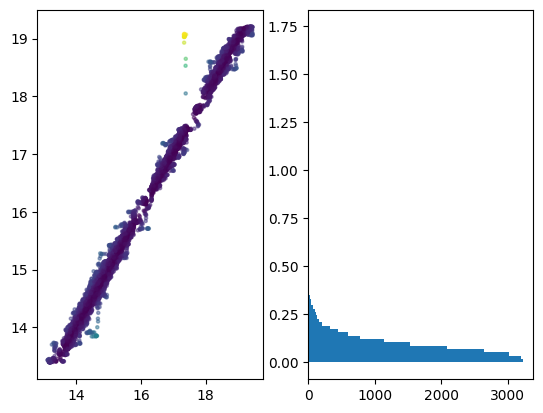

In [ ]:
model2 = Sequential()
model2.add(LSTM(input_shape = (20,1), units = 5))
model2.add(Dense(units=1, activation='sigmoid'))

model2.compile(loss='mae')
model2.fit(x_treino, y_treino, validation_data=(x_teste, y_teste), epochs=10)

comparacao = pd.DataFrame(data={'real': normalizador.inverse_transform(y_teste.reshape(-1,1)).squeeze(),
                                 'prev': np.round(normalizador.inverse_transform(model2.predict(x_teste)).squeeze(), 2)})
comparacao['dif'] = abs(comparacao.real - comparacao.prev)
fig, axs = plt.subplots(ncols=2)
axs[1].hist(x=comparacao['dif'], bins=100, orientation='horizontal')
axs[0].scatter(x=comparacao['real'],y=comparacao['prev'],c=comparacao['dif'],alpha=.5, s=5)

Epoch 1/10
1468/1468 [==============================] - 24s 13ms/step - loss: 0.0343 - val_loss: 0.0241
Epoch 2/10
1468/1468 [==============================] - 18s 12ms/step - loss: 0.0170 - val_loss: 0.0138
Epoch 3/10
1468/1468 [==============================] - 19s 13ms/step - loss: 0.0150 - val_loss: 0.0128
Epoch 4/10
1468/1468 [==============================] - 19s 13ms/step - loss: 0.0137 - val_loss: 0.0111
Epoch 5/10
1468/1468 [==============================] - 18s 12ms/step - loss: 0.0128 - val_loss: 0.0114
Epoch 6/10
1468/1468 [==============================] - 19s 13ms/step - loss: 0.0123 - val_loss: 0.0111
Epoch 7/10
1468/1468 [==============================] - 18s 12ms/step - loss: 0.0119 - val_loss: 0.0117
Epoch 8/10
1468/1468 [==============================] - 19s 13ms/step - loss: 0.0116 - val_loss: 0.0141
Epoch 9/10
1468/1468 [==============================] - 19s 13ms/step - loss: 0.0113 - val_loss: 0.0103
Epoch 10/10
629/629 [==============================] - 2s 3ms/st

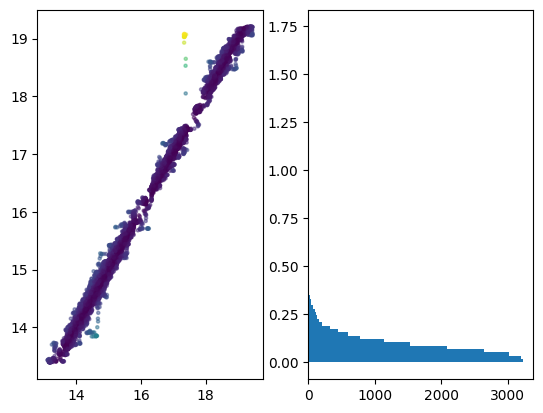

In [ ]:
model3 = Sequential()
model3.add(LSTM(input_shape = (20,1), units = 20))
model3.add(Dense(units=25, activation='sigmoid'))
model3.add(Dense(units=1, activation='sigmoid'))

model3.compile(loss='mae')
model3.fit(x_treino, y_treino, validation_data=(x_teste, y_teste), epochs=10)


629/629 [==============================] - 3s 4ms/step


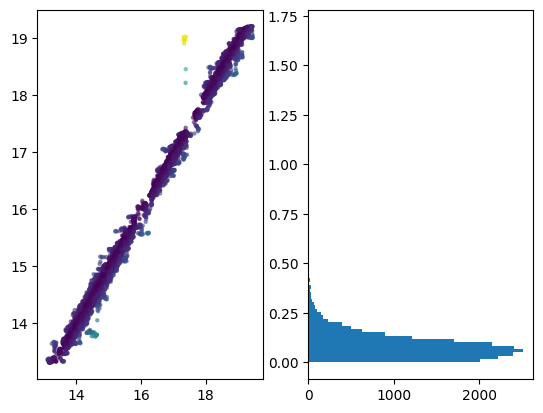

In [ ]:
comparacao = pd.DataFrame(data={'real': normalizador.inverse_transform(y_teste.reshape(-1,1)).squeeze(),
                                 'prev': np.round(normalizador.inverse_transform(model3.predict(x_teste)).squeeze(), 2)})
comparacao['dif'] = abs(comparacao.real - comparacao.prev)
fig, axs = plt.subplots(ncols=2)
axs[1].hist(x=comparacao['dif'], bins=100, orientation='horizontal')
axs[0].scatter(x=comparacao['real'],y=comparacao['prev'],c=comparacao['dif'],alpha=.5, s=5)

In [ ]:
model4 = Sequential()
model4.add(LSTM(input_shape = (20,1), units = 20, return_sequences = True))
model4.add(LSTM(units = 10))
model4.add(Dense(units=25, activation='sigmoid'))
model4.add(Dense(units=1, activation='sigmoid'))

model4.compile(loss='mae')
model4.fit(x_treino, y_treino, validation_data=(x_teste, y_teste), epochs=10)


Epoch 1/10
1468/1468 [==============================] - 40s 24ms/step - loss: 0.0315 - val_loss: 0.0219
Epoch 2/10
1468/1468 [==============================] - 35s 24ms/step - loss: 0.0166 - val_loss: 0.0215
Epoch 3/10
1468/1468 [==============================] - 35s 24ms/step - loss: 0.0144 - val_loss: 0.0127
Epoch 4/10
1468/1468 [==============================] - 34s 23ms/step - loss: 0.0131 - val_loss: 0.0109
Epoch 5/10
1468/1468 [==============================] - 34s 23ms/step - loss: 0.0124 - val_loss: 0.0164
Epoch 6/10
1468/1468 [==============================] - 35s 24ms/step - loss: 0.0120 - val_loss: 0.0113
Epoch 7/10
1468/1468 [==============================] - 35s 24ms/step - loss: 0.0117 - val_loss: 0.0130
Epoch 8/10
1468/1468 [==============================] - 33s 23ms/step - loss: 0.0115 - val_loss: 0.0123
Epoch 9/10
1468/1468 [==============================] - 35s 24ms/step - loss: 0.0113 - val_loss: 0.0133
Epoch 10/10
1468/1468 [==============================] - 34s 23m

629/629 [==============================] - 5s 6ms/step


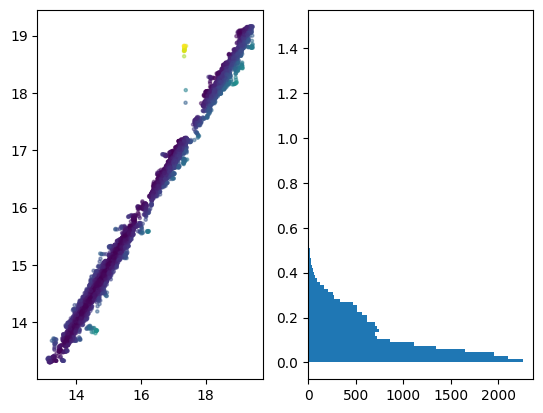

In [ ]:
comparacao = pd.DataFrame(data={'real': normalizador.inverse_transform(y_teste.reshape(-1,1)).squeeze(),
                                 'prev': np.round(normalizador.inverse_transform(model4.predict(x_teste)).squeeze(), 2)})
comparacao['dif'] = abs(comparacao.real - comparacao.prev)
fig, axs = plt.subplots(ncols=2)
axs[1].hist(x=comparacao['dif'], bins=100, orientation='horizontal')
axs[0].scatter(x=comparacao['real'],y=comparacao['prev'],c=comparacao['dif'],alpha=.5, s=5)

Este é um desafio bem maior para os modelos. Já vemos erros maiores e valores mais distantes do real.

Concluímos que os modelos menos complexos (menos unidades de recorrência) performam melhor. O modelo 2 possui erros menos dispersos quando comparados aos outros (modelos 3 e modelo 4).

Acreditamos que prever o valor imediatamente após as amostras de entrada (salto = 0), como na sessão anterior, acaba não discriminando o suficiente um modelo do outro para que uma conclusão sólida seja criada. Prever um futuro mais longo discrimina mais os modelos e pode ser mais fácil de ter uma utilização prática.